In [2]:
#fetching the datset from dropbox
!wget https://www.dropbox.com/sh/u16c26h7sw924ui/AADuchrtp1x8AL4HIm0W-tXGa?dl=0

--2021-09-02 13:49:34--  https://www.dropbox.com/sh/u16c26h7sw924ui/AADuchrtp1x8AL4HIm0W-tXGa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/u16c26h7sw924ui/AADuchrtp1x8AL4HIm0W-tXGa [following]
--2021-09-02 13:49:34--  https://www.dropbox.com/sh/raw/u16c26h7sw924ui/AADuchrtp1x8AL4HIm0W-tXGa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc192a143476835a171661b90290.dl.dropboxusercontent.com/zip_download_get/A4xk6Hc99lH7-JdII7B4HbqaDFtqKujH6kauC1Ev1frLaglqWrTFx-6Lr_wADt0GKzOi_ek7jTmisN8tGxV7fZXG6-lsHpGfmoepXO0psTVH0g# [following]
--2021-09-02 13:49:36--  https://uc192a143476835a171661b90290.dl.dropboxusercontent.com/zip_download_get/A4xk6Hc99lH7-JdII7B4HbqaDFtqKujH6kauC1Ev1frLaglqWrTFx-6Lr_wADt0GKzOi_ek7jTmis

In [ ]:
#unzipping the dataset folder
!unzip Ds

In [12]:
TRAIN_PATH="Ds/Training"

In [13]:
VAL_PATH="Ds/Testing"

In [14]:
import numpy as np
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [15]:
#model definition
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])

#used to detect feature in very tiny areas of the image.Its gonna learn a hidden pattern.As you go deeper into the layered network,
#the receptive feild of the CNN increases. So, the feature it extracts are quite a bigger part of the original picture.
#(3x3) is the standard kernel size picked

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

In [17]:
#Train from scratch
#so we'll use the keras image data generator library to make the data ready for the mode
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_dataset=image.ImageDataGenerator(rescale=1./255)

In [18]:
#creating actual generator function
train_generator=train_datagen.flow_from_directory(
    'Training',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 2870 images belonging to 4 classes.


In [19]:
train_generator.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [20]:
#creating the validation function
validation_generator=test_dataset.flow_from_directory(
    'Testing',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 394 images belonging to 4 classes.


In [21]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 67s 8s/step - loss: 1.0899 - accuracy: 0.5918 - val_loss: 0.6414 - val_accuracy: 0.7500
Epoch 2/10
8/8 [==============================] - 65s 8s/step - loss: 0.5957 - accuracy: 0.7500 - val_loss: 0.5959 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 62s 8s/step - loss: 0.5791 - accuracy: 0.7500 - val_loss: 0.5822 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 64s 8s/step - loss: 0.5750 - accuracy: 0.7500 - val_loss: 0.5739 - val_accuracy: 0.7500
Epoch 5/10
8/8 [==============================] - 62s 8s/step - loss: 0.5713 - accuracy: 0.7500 - val_loss: 0.5701 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 64s 8s/step - loss: 0.5691 - accuracy: 0.7500 - val_loss: 0.5734 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 63s 8s/step - loss: 0.5698 - accuracy: 0.7500 - val_loss: 0.5699 - val_accuracy: 0.7500
Epoch 8/10
8/8 [==================

In [24]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.5733467936515808, 0.75]

In [25]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.5703150629997253, 0.75]

In [26]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


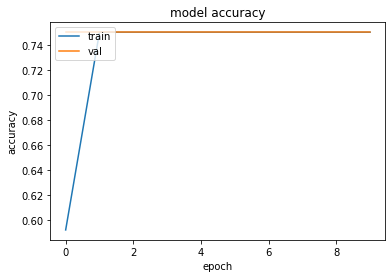

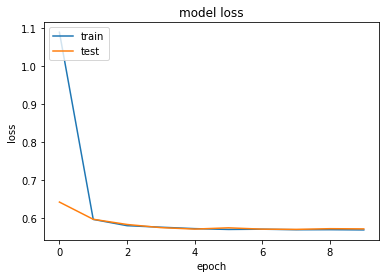

In [58]:
import matplotlib.pyplot as plt
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()